In [1]:
%matplotlib inline
# 1. Importing data
data = pd.read_csv("data.csv")
data = data.sample(frac=1)

In [2]:
# 2. Data preprocessing
X = data['km'].values
y = data['price'].values

In [3]:
# 3. Initialize model parameters
learning_rate = 0.001
iterations = 100000
m = len(y)
theta = np.zeros(2)

In [4]:
# # Data normalization
X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std

X_mean, X_std, X

(101066.25,
 51565.1899106445,
 array([ 0.84230757,  1.6379994 , -0.73705246, -0.1564282 ,  1.27476986,
         0.75116081,  2.69433217, -0.63155493, -0.68635935, -0.36918801,
        -1.02455261, -0.48562315, -0.66064432,  0.95866514, -0.77799093,
        -0.06916003,  1.4531848 , -0.76170087, -0.33096455, -0.91275238,
        -1.51589183, -0.52489383,  0.26633762, -0.23399991]))

In [5]:
rss_trace = []
theta0_trace = []
theta1_trace = []

# 4. Implementing the gradient descent algorithm
for _ in range(iterations):
    # Calculating predicted values
    y_pred = theta[0] + theta[1] * X

    # Calculating error
    error = y_pred - y

    sum_error = np.sum(error)
    if sum_error**2 < 0.001:
        break

    # Updating parameters
    gradient_0 = np.sum(error) / m
    gradient_1 = np.sum(error * X) / m
    theta[0] -= learning_rate * gradient_0
    theta[1] -= learning_rate * gradient_1

    rss_trace.append(sum_error**2)
    theta0_trace.append(theta[0])
    theta1_trace.append(theta[1])

theta0_trace = np.array(theta0_trace)
theta1_trace = np.array(theta1_trace)
print(len(theta0_trace))
print(learning_rate)
print(sum_error**2)
theta[0], theta[1]

15378
0.001
0.000999165229089929


(6331.83201626771, -1106.019650932758)

In [6]:
# Restore to original scale with inverse normalization
for i in range(len(theta0_trace)):
    theta0_trace[i] = theta0_trace[i] - theta1_trace[i] * X_mean / X_std
    theta1_trace[i] = theta1_trace[i] / X_std
theta[0] = theta[0] - theta[1] * X_mean / X_std
theta[1] = theta[1] / X_std

X = X*X_std + X_mean


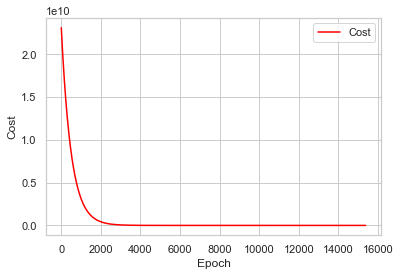

In [7]:
# Visualize Cost
plt.plot(range(len(rss_trace)), rss_trace,
        color='red', label='Cost')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend()
plt.show()

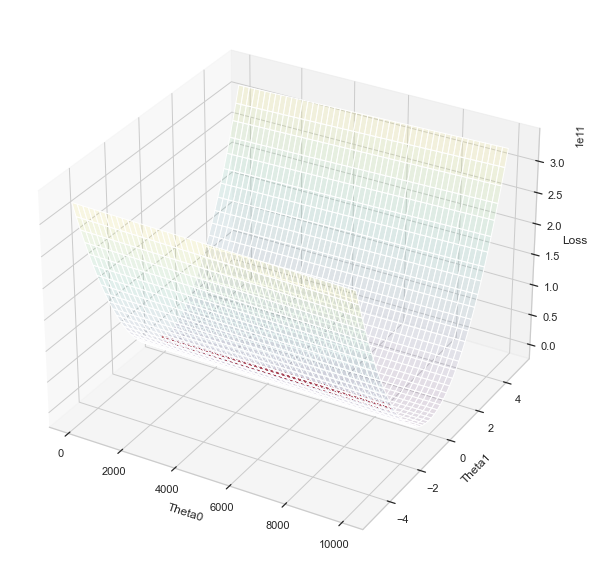

In [8]:
# Draw 3D MSE (Mean Squared Error)

def loss_function(theta0, theta1):
    return np.mean((theta0 + theta1 * X - y) ** 2)

theta0_values = np.linspace(0, 10000, 50)
theta1_values = np.linspace(-5, 5, 50)

theta0_mesh, theta1_mesh = np.meshgrid(theta0_values, theta1_values)
loss_values = np.zeros_like(theta0_mesh)

for i in range(len(theta0_values)):
    for j in range(len(theta1_values)):
        loss_values[i, j] = loss_function(theta0_mesh[i, j], theta1_mesh[i, j])

fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(theta0_mesh, theta1_mesh, loss_values, cmap='viridis', alpha=0.1)


# Display points obtained from gradient descent and calculate loss values
loss_values_trace = np.zeros_like(theta0_trace)
for i in range(len(theta0_trace)):
    loss_values_trace[i] = loss_function(theta0_trace[i], theta1_trace[i])

ax.scatter(theta0_trace, theta1_trace, loss_values_trace, c='r', marker='o', label='Gradient Descent Path')
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Loss')

plt.show()


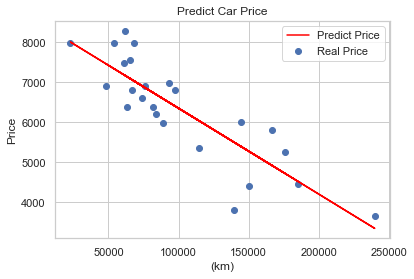

In [9]:
# 5. Visualize results
plt.scatter(X, y, label='Real Price')
plt.plot(X, (theta[0] + theta[1] * X),
        color='red', label='Predict Price')
plt.xlabel('(km)')
plt.ylabel('Price')
plt.legend()
plt.title('Predict Car Price')
plt.show()

In [10]:
# Predict Price
input_km = float(input('Enter the mileage in kilometers: '))
# 100000km
print(f"Estimated price for that mileage: {theta[0] + theta[1] * input_km}")

Estimated price for that mileage: 6354.701968940251


In [11]:
# R-squared
predic_y = [theta[0] + theta[1] * X]
r_squared = 1 - (np.sum((y - predic_y)**2)) / np.sum((y - [np.mean(y) for i in range(len(y))])**2)
r_squared

0.7329747078304254